### Exploratory Data Analysis

## Goal

- Investigation of top-paying roles and skills in the data field.
- Using Python to explore and analyze a real-life dataset on job offers.

In [23]:
### Importing necessary libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

### Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

### Basic data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filtering for US Data Analyst roles

In [9]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [13]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

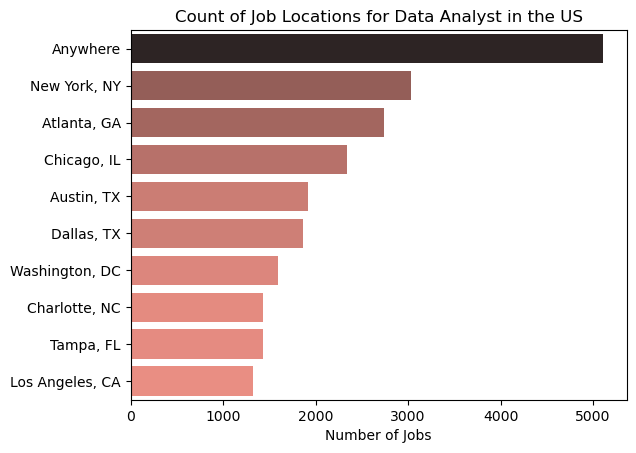

In [16]:
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette= 'dark:salmon_r', legend=False)
plt.title('Count of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

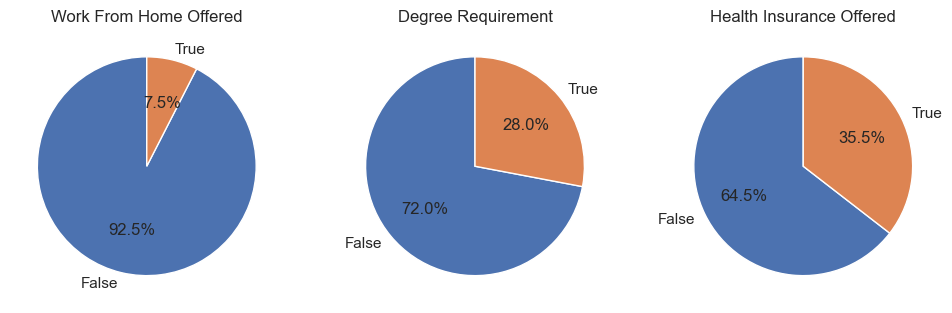

In [24]:
dict_column = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()

sns.set_theme(style='ticks')
sns.palette='dark:salmon_r'

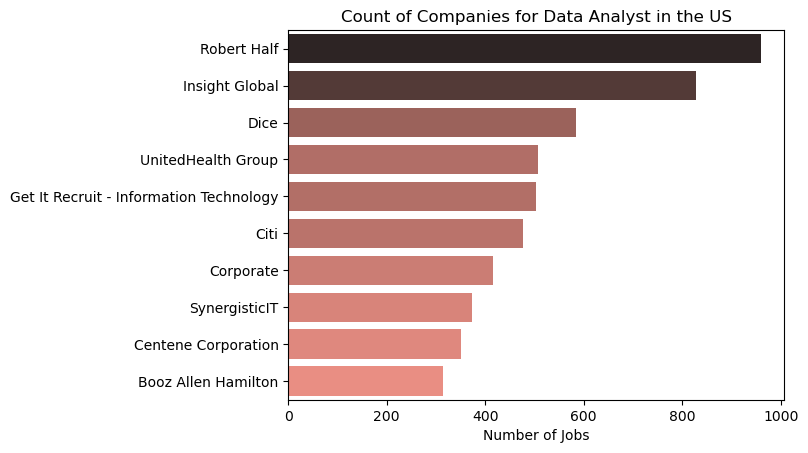

In [21]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette= 'dark:salmon_r', legend=False)
plt.title('Count of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()